# ***Experiment 6: Support Vector Machines***

### Name: Aryan Dali             
###UID: 2019120016 
###Class: TE EXTC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Above is a function to make a plot of the support vector machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1]+1

Generating 20 Observations randomly and seperating them into classes.

Text(0, 0.5, 'X2')

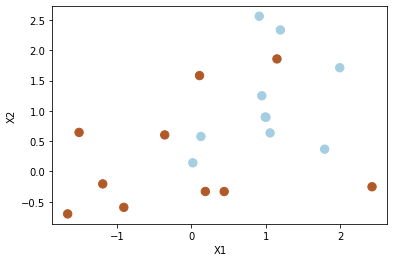

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Plotting the randomly generated points

In [ ]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

Making the SVC of the generated points with C = 1 and the kernel as linear

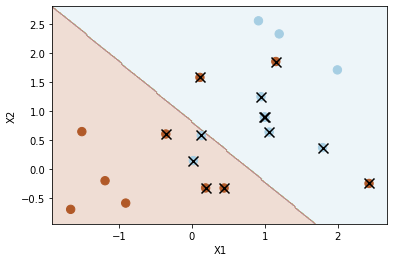

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

We can see that when C = 1 No. of support vectrs is 13

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

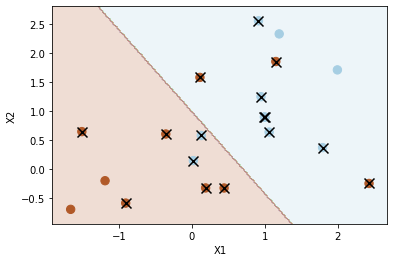

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

For C = 0.1 no. of support vectors is 16

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

We wan to see which C parameter is the best to make our support vector machine so we pass tuned parameters which have multiple C values. After we obtained the results we will see which C value is the best

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00146143, 0.00114441, 0.00138247, 0.0006315 , 0.00043905,
        0.00045528, 0.00056968]),
 'mean_score_time': array([0.00058742, 0.00046158, 0.00035613, 0.00028646, 0.00025413,
        0.00025156, 0.00025833]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [ ]:
clf.best_params_

{'C': 0.001}

We can see that the best C value is C = 0.001

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

We again generate 20 random numbers 

In [ ]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


We make SVC using C = 0.01 since it is the best C value.

Text(0, 0.5, 'X2')

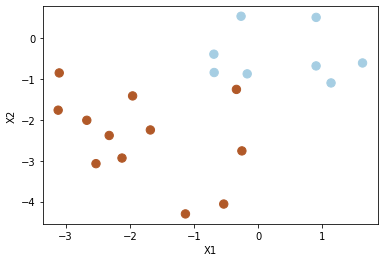

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Plotting all the points generated

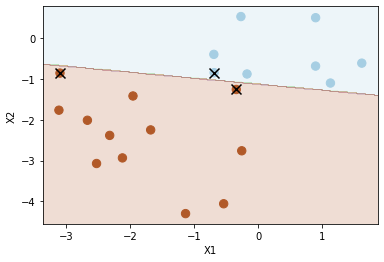

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

No we make the support vector line and we can see that for C = 1e5 No.of support vectors are 3

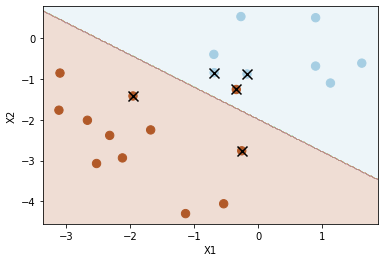

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

We make the support vector line and we can see that for C = 1 No.of support vectors are 5

Using cost = 1, we misclassify a training observation, but we also obtain a much wider margin and make use of five support vectors. It seems likely that this model will perform better on test data than the model with cost = 1e5.

Text(0, 0.5, 'X2')

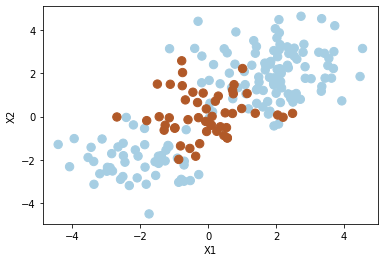

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Random data points are generated which belong to 2 seperate classes that are linearly not seperable. Since one class is stuck between another class we will have to use the radial kernel method of SVM with gamma = 1.

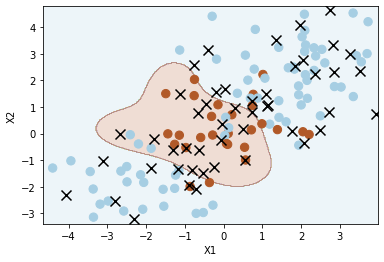

Number of support vectors:  51


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

We casn see that there are alot of errors and the two classes are not seperated. It can be improved by increasing the cost from 1 to 100. The number of support vectors is 51

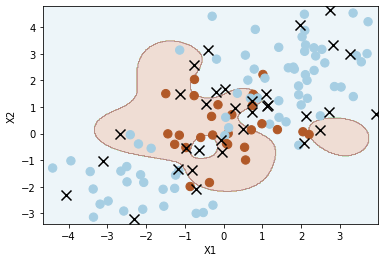

Number of support vectors:  36


In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

The number of support vectors is 36. The cost is increased but because of that the boundary is very irregular.

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

With the help  of gridsearchCV() we can find the best combination for the value of C and Gamma. We find out that the best values are C = 10 and Gamma = 0.5

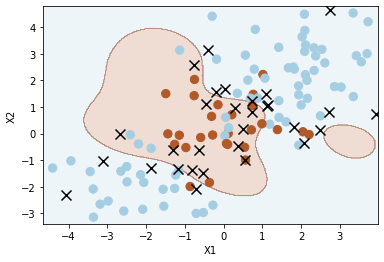

Number of support vectors:  32
[[66  7]
 [ 6 21]]
0.87


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

On applying the best parameters to our radial kernel SVM i.e.  C = 10 and Gamma = 0.5 we get the above plot. The number of support vectors is 32 in this case.

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

We now are plotting the ROC curve so we import auc and roc_curve

In [ ]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

We fit the more constrained model with C = 1 and Gamma = 1

In [ ]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

We try to fit the more flexible model cost = 1 and gamma = 50

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

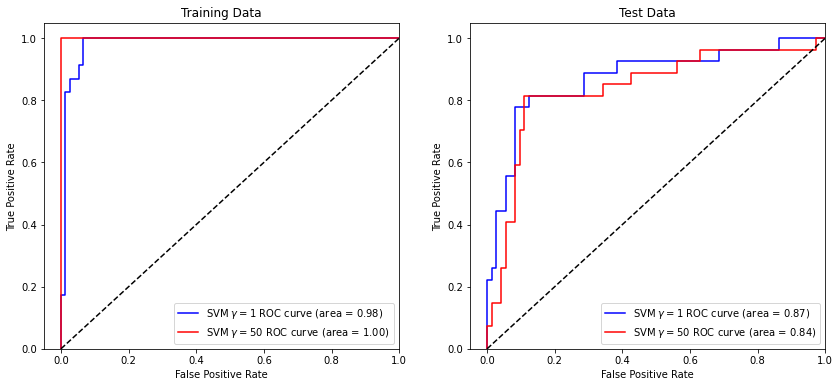

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

Here we can see that we have recieved the ROC curves. For the training data we can see that case with gamma = 50 gives better result (area = 1.00 compared to 0.98 for the other case) while for trsting data gamma =  1 gives a better result as compared to gamma = 50 (area = 0.87 as compared to 0.84 in other case